# Decision Trees for classifying Fake News

In this section, we will be exploring the power of decision trees in determining whether an article is fake or real. Decision trees our made up of a root node which splits into internal nodes which branches into edges and ends up at a leaf which is the end of the branch. The types of questions that we will ask ourselves when forming this decision tree will determine the accuracy of our tree. It is important to take into consideration the types of words used in the article, the grammar and spelling accuracy as well as keywords that are consistently used in fake articles when formulating our decision tree.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

We firstly must import the data set from which we will be working with. 

In [2]:
import pandas as pd
df = pd.read_csv('news.csv')
df.head(6335)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


As we can see above within our data set we can see whether the article is real or fake. Once we have made our decision tree for the data we will then test the accuracy of using the Decision tree. This will be able to indicate whether it was a good way of classifying whether an article is real or fake.

From the Data pre-processing document the steps of the following code is explained in detail. We need to vectorise our articles into individual words. This makes our article easier to work with when implementing different techniques. 

In [3]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.
#It is important to have this code in the notebook so we use the array with the Decision Tree Classifier

import numpy as np
import pandas as pd

df = pd.read_csv('news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()


# We need the Vectorization

df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix


<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size=0.3, random_state = 42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
accuracy = dtc.score(x_test,y_test)
accuracy

0.8048395581273015

As you can see we have got an accuracy of 80.0%. Since we set the test size at 30% it is crucial that we investigate the effect of test size to training size ratio to see whether it effects the accuracy. 

In [7]:
size = np.arange(0.01,0.5,0.01)
accuracy = []
for i in size:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = i, random_state = 42)
    dtc.fit(x_train, y_train)
    a = dtc.score(x_test,y_test)
    accuracy.append(a)
accuracy 

[0.859375,
 0.8267716535433071,
 0.8324607329842932,
 0.8661417322834646,
 0.8485804416403786,
 0.84251968503937,
 0.8243243243243243,
 0.8086785009861933,
 0.8126094570928196,
 0.8249211356466877,
 0.8220946915351507,
 0.8028909329829172,
 0.8252427184466019,
 0.8173618940248027,
 0.8138801261829653,
 0.8086785009861933,
 0.8282265552460538,
 0.8115687992988606,
 0.8172757475083057,
 0.8018942383583267,
 0.8241923365890308,
 0.8084648493543759,
 0.803840877914952,
 0.809335963182117,
 0.8150252525252525,
 0.8046116504854369,
 0.8047925189947399,
 0.8027057497181511,
 0.7992383025027203,
 0.8022093634928985,
 0.7892057026476579,
 0.8002958579881657,
 0.8077474892395983,
 0.7966573816155988,
 0.7984670874661858,
 0.7930732135028496,
 0.7939419795221843,
 0.7944352159468439,
 0.79279643868879,
 0.8074191002367798,
 0.8048498845265589,
 0.7989477639984968,
 0.7959633027522935,
 0.7977044476327116,
 0.8067344791301297,
 0.7862778730703259,
 0.7877770315648086,
 0.793160144689247,
 0.793880

These are the different accuracys for each test size. A more visual representation of this would be to see a scatter graph of this.

In [8]:
import matplotlib.pyplot as plt
plt.scatter(size, accuracy)
plt.xlabel('Test Size')
plt.ylabel('Accuracy of Decision Tree Classifier')

Text(0, 0.5, 'Accuracy of Decision Tree Classifier')

In [9]:
print(size[np.argmax(accuracy)])
print(accuracy[np.argmax(accuracy)]*100)

0.04
86.61417322834646


The Decision Tree Classifier give the best accuracy when we split the data into 95% training data and 5% testing data. The accuracy here is 85%. 

## Random Forest Classifier 

A Random Forest Classifier classifies the data by using subsections of the data. It uses averages to improve the overall accuracy of decision tress by creating a forest of many different decision trees. 

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
accuracy1 = rfc.score(x_test,y_test)
accuracy1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8090177133655394

The Random forest classifier has given us an improved accuracy to that of the Decision tree classifier. The accuracy is approximately 82% compared to 80% in the Decision tree classifier. Let's see if changing the size of the training and test data will change the accuracy of the Random forest classifier.  

In [21]:
size = np.arange(0.01,0.5,0.01)
accuracy1 = []
for i in size:
    x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix, df_output, test_size = i, random_state = 42)
    rfc.fit(x_train, y_train)
    a = rfc.score(x_test,y_test)
    accuracy1.append(a)
accuracy1 

KeyboardInterrupt: 

This is an array of the different accuracys of the random forest classifier. We want to plot this data and see for what ratio of test to training data the random forest classifier outputs the highest accuracy.

Text(0, 0.5, 'Accuracy of Random Forest Classifier')

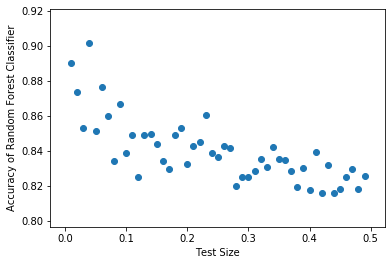

In [12]:
import matplotlib.pyplot as plt
plt.scatter(size, accuracy1)
plt.xlabel('Test Size')
plt.ylabel('Accuracy of Random Forest Classifier')

In [13]:
print(size[np.argmax(accuracy1)])
print(accuracy1[np.argmax(accuracy1)]*100)

0.04
90.15748031496062


We can see here that the highest accuracy is 92% when the test size is 1%. 

## Testing on Unseen Data

We want to test both of our classifiers on unseen data to see if it works in all cases. This is a much more specific approach to classifying fake news. 

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()
    

def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [15]:
def DecisionTree_classifier (list_of_articles):
    
    # Pre-process the articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train, y_train)
    accuracy = dtc.score(x_test,y_test)
    print('Decision tree classifier accuracy: ' + str(accuracy))
    # The model can now classify the new data
    predictions = dtc.predict(new_data_matrix)
    return predictions

In [16]:
def RandomForest_classifier (list_of_articles):
    
    # Pre-process the articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    # Append new articles to original list of articles (df_input)
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    accuracy = rfc.score(x_test,y_test)
    print('Random Forest classifier model accuracy: ' + str(accuracy))
    # The model can now classify the new data
    predictions = rfc.predict(new_data_matrix)
    return predictions

In [17]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [18]:
articles = [bbc_news_article,fake_article]
print(DecisionTree_classifier(articles))
print(RandomForest_classifier(articles))

Decision tree classifier accuracy: 0.8169191919191919
[0 0]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest classifier model accuracy: 0.8446969696969697
[0 1]


As we can see both the Decision Tree and Random Forest classifier thought both the articles were false news articles. This means they both failed to identify that the BBC news article is in fact real. 

## Confusion Matrix 

A way in which we can interpret how well our classifiers work with our chosen data set is by creating a confusion matrix. Also known as an error matrix, it is a great way in enabling us to visualise how a supervised learning technique performs.

In [19]:
y_pred = dtc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report 
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#This is the classification report and confusion matrix for the Decision Tree Classifier.

[[1242  319]
 [ 321 1223]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1561
           1       0.79      0.79      0.79      1544

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [20]:
y_pred = rfc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#This is the classification report and confusion matrix for the Random Forest Classifier.

[[1358  203]
 [ 338 1206]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1561
           1       0.86      0.78      0.82      1544

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

